In [1]:
import matplotlib.pyplot as plt
import nz_vae as nzml
import numpy as np

In [4]:
# To re-build model files
# nzml.make_all_models()

# nzml.make_model_1_padding(True)
nzml.make_dense_model_2(2, False)
nzml.make_dense_model_3(6, False)


In [5]:
def distance_from_mean(mu, sims):
    d = sims - mu
    return np.sum(d**2, axis=(1,2))**0.5

In [7]:
nz_data = nzml.load_data()
nz_mean = np.mean(nz_data, axis=0)
encoder, decoder, latent_dim = nzml.load_model("models/dense-2")
model = nzml.VAE2(encoder, decoder, latent_dim, kl_weight=1)


In [8]:
history = model.fit_to_nz_data(nz_data, 2000)

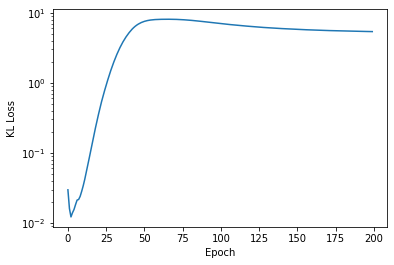

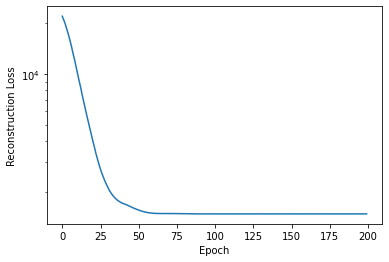

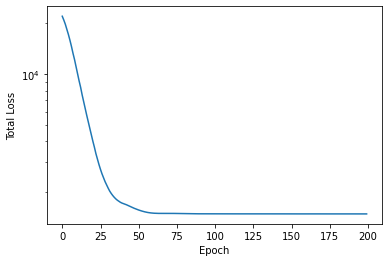

In [9]:
model.plot_history(history, log=True)

75/75 [==============================] - 0s 650us/step


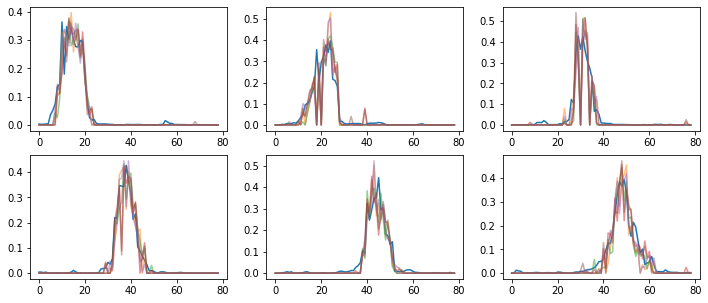

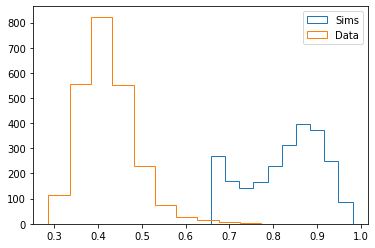

In [10]:
nz_sim = model.generate_nz_draws(2400)
plt.figure(figsize=(12,5))
# pick and plot one realization versus the mean
for i in range(6):
    plt.subplot(2, 3, i+1)
    line, = plt.plot(nz_data[0, i])
    for j in range(200, 205):
        plt.plot(nz_sim[j, i], alpha=0.5)

plt.figure()
plt.hist(distance_from_mean(nz_mean, nz_sim), histtype='step', label='Sims')
plt.hist(distance_from_mean(nz_mean, nz_data), histtype='step', label='Data')
plt.legend()

In [11]:
z_mean, z_log_var, c = encoder(nz_data)

In [12]:
z_var = np.exp(z_log_var)
z_std = np.sqrt(z_var)

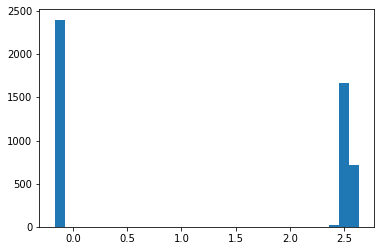

In [13]:
plt.hist(z_mean.numpy().flatten(), bins=30);

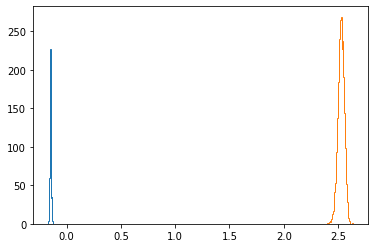

In [14]:
plt.hist(z_mean[:,0].numpy().flatten(), bins=30, histtype='step');
plt.hist(z_mean[:,1].numpy().flatten(), bins=30, histtype='step');

In [15]:
axes = [np.linspace(-4, 4, 40) for i in range(2)]
y, x = np.meshgrid(*axes)

In [16]:
grid = np.zeros((1600, model.latent_dim))
grid[:, 0:2] = np.array([x.flatten(), y.flatten()]).T
grid_nz = model.decoder.predict(grid)
grid_nz = np.array(model.normalize_nz(grid_nz))
grid_nz_2d = grid_nz.reshape(x.shape + nz_data.shape[1:])

50/50 [==============================] - 0s 768us/step


In [17]:
grid_dist = distance_from_mean(nz_mean, grid_nz).reshape(x.shape)

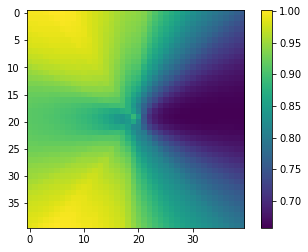

In [18]:
plt.imshow(grid_dist)
plt.colorbar()